In [94]:
import numpy as np
from matplotlib import pyplot as plt

In [262]:
class line:
    def __init__(self, p1, p2, mode="finite"):
        self.p1 = p1
        self.p2 = p2
        self.mode = mode
        if self.p1[0] == self.p2[0]:
            if self.p1[1] == self.p2[1]:
                self.a = 0
                self.c = 1
                self.b = 0
            else:
                self.c = 0
                self.a = 1
                self.b = self.p1[0]
        elif self.p1[1] == self.p2[1]:
            self.a = 0
            self.c = 1
            self.b = self.p1[1]
        else:
            self.a = (self.p2[1]-self.p1[1])/(self.p2[0]-self.p1[0])
            self.b = self.p1[1]-self.a*self.p1[0]
            self.c = 1
        
    def equation(self, p):
        return self.c*p[1]-self.a*p[0]-self.b
    
    def isin(self, p):
        cond_equation = self.equation(p) == 0
        if self.mode == "finite":
            cond_x = (self.p1[0]-p[0])*(self.p2[0]-p[0]) <= 0
            cond_y = (self.p1[1]-p[1])*(self.p2[1]-p[1]) <= 0
        elif self.mode == "semi":
            cond_x = (self.p1[0]-p[0]) < 0
            cond_y = (self.p1[1]-p[1]) < 0
        return cond_equation and cond_x and cond_y
    
    def intersect(self, line):
        p=[0,0]
        if self.c * line.c > 0:
            if self.a != line.a:
                p[0] = (line.b - self.b)/(self.a-line.a)
                p[1] = self.a*p[0]+self.b
                print("p=",p)
                if self.isin(p) and line.isin(p):
                    return p
                else:
                    return None
            else:
                return None
        elif self.c == 0 and line.c != 0:
            p[1] = line.b-self.b
            p[0] = self.b
        elif line.c == 0 and self.c != 0:
            p[1] = self.b-line.b
            p[0] = line.b
        elif line.c == 0 and self.c == 0:
            return None
        
    def print(self):
        print(self.a, self.b, self.c)
        

In [263]:
d=line([3/4,3/4], [1/4,1/4])
d.print()
d.isin([0.76,0.76])

1.0 0.0 1


False

In [264]:
class billard:
    def __init__(self, corners, position=np.array([0,0]),slope=[1,1]):
        self.position = position
        self.slope = slope
        self.path = line(self.position, [self.position[0]+self.slope[0],self.position[1]+self.slope[1]], "semi")
        self.corners = corners
        self.line = []
        self.bounce_line = None
        self.bounces = [position]
        for i in range(len(self.corners)):
            self.line.append(line(self.corners[i%len(self.corners)], self.corners[(i+1)%len(self.corners)]))
    
    def plot(self):
        xs, ys = zip(*(self.corners+[self.corners[0]]))
        plt.plot(xs,ys)
        xb, yb = zip(*self.bounces)
        plt.plot(xb,yb)
        
    def bounce(self):
        for l in self.line:
            l.print()
            intersection = self.path.intersect(l)
            if intersection:
                self.bounce_line=l
                break
        self.bounces.append(intersection)
        self.position = intersection
        if self.bounce_line.a == 0:
            self.slope = [-self.slope[0], self.slope[1]]
        else:
            normal = -1/self.bounce_line.a 
            incident = self.slope[1]/self.slope[0]
            reflected = reflect(incident, normal)
            self.slope = [1,reflected]
        self.path = line(self.position, self.slope)
    
    def reflect(k1,k2):
        return (k1*k2*k2+2*k2-k1)/(1+2*k1*k2-k2*k2)
    

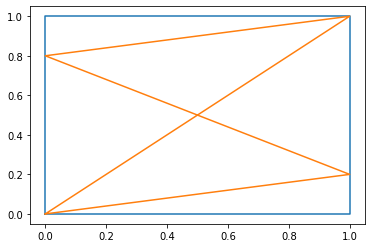

In [265]:
c=[[0,0], [0,1], [1,1], [1,0]]
cd=[[0,0], [1,1], [0,0.8], [1,0.2]]
xs, ys = zip(*(c+[c[0]]))
xsd, ysd = zip(*(cd+[cd[0]]))
plt.plot(xs,ys)
plt.plot(xsd,ysd)

In [266]:
b=billard([[0,0], [0,1], [1,1], [1,0]], position=[0,0], slope=[1,0.8])

In [267]:
b.bounce()

1 0 0
0 1 1
p= [1.25, 1.0]
1 1 0
0 0 1
p= [0.0, 0.0]


AttributeError: 'NoneType' object has no attribute 'a'

In [268]:
l1=line([1,0], [1,1])
l2=line([0,0], [1,0.8], "semi")
l2.intersect(l1)


In [250]:
b.bounce()

p= [1.25, 1.0]
p= [0.0, 0.0]


AttributeError: 'NoneType' object has no attribute 'a'

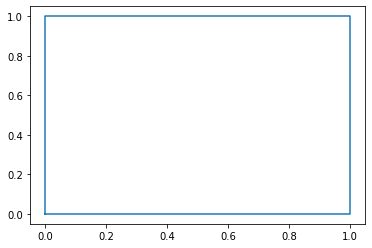

In [249]:
b.plot()